In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import isnan

In [110]:
def load_clinical_trials_data(path_to_data: str = None) -> pd.DataFrame:
    if path_to_data is None:
        path_to_data = "../src/data/ZINC_references_trials.json"
    df = pd.read_json(path_to_data).T
    df = df.rename(columns={"references": "trials"})
    df.index.name = "ZINC ID of Ligand"
    df_all = pd.DataFrame()
    for zinc_id, trials in df.iterrows():
        if not isinstance(trials["trials"], list) and isnan(trials["trials"]):
            continue
        trials_df = pd.DataFrame(trials["trials"])
        trials_df["ZINC ID of Ligand"] = zinc_id
        df_all = pd.concat([df_all, trials_df], axis=0)
    return df_all

In [111]:
df_all = load_clinical_trials_data()

In [112]:
df_all

,code,description,status_name,phase_name,start_date,ZINC ID of Ligand
0,NCT03114228,An Expanded Treatment Protocol (ETP) of Midost...,No longer available,None,None,ZINC03814434
1,NCT02624570,Midostaurin Access Program for Newly Diagnosed...,Available,None,None,ZINC03814434
2,NCT03258931,Study of Crenolanib vs Midostaurin Following I...,Not yet recruiting,Phase 3,2018-05-01,ZINC03814434
3,NCT03207334,iCare4: Genomic Signatures With Midostaurin in...,Not yet recruiting,Phase 2,2018-05-01,ZINC03814434
4,NCT03092674,Azacitidine With or Without Nivolumab or Midos...,Recruiting,Phase 2/Phase 3,2017-12-22,ZINC03814434
...,...,...,...,...,...,...
193,NCT00010010,Exemestane Plus Goserelin in Treating Premenop...,Completed,Phase 2,2000-06-01,ZINC03973334
194,NCT00200174,Combined Estrogen Blockade of the Breast With ...,Completed,None,1999-07-01,ZINC03973334
195,NCT00003418,Exemestane Compared With Tamoxifen in Treating...,None,Phase 3,1998-02-01,ZINC03973334
196,NCT00038467,Randomized Trial Of Exemestane Versus Continue...,Completed,Phase 3,1998-02-01,ZINC03973334


In [113]:
df_all.describe(include="all")

,code,description,status_name,phase_name,start_date,ZINC ID of Ligand
count,71810,71750,66490,58555,70082,71810
unique,49658,49392,12,7,2756,543
top,NCT02374567,Pharmacovigilance in Gerontopsychiatric Patients,Completed,Phase 2,2009-01-01,ZINC03875332
freq,53,53,43247,15532,499,2015


In [114]:
def plot_clinical_counts(
    df: pd.DataFrame,
    ax,
    col: str,
    ylabel: str = None,
    title: str = None,
    top_n: int | None = None,
    yscale: str | None = None,
):
    count_df = df[col].value_counts().reset_index()
    if top_n is not None:
        count_df.loc[top_n:, col] = "Other"
    sns.barplot(
        count_df,
        x=col,
        y="count",
        order=count_df[col][: top_n + 1] if top_n is not None else None,
        ax=ax,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if yscale is not None:
        ax.set_yscale(yscale)
    ax.set_xlabel(col.replace("_", " ").capitalize())
    return ax

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_12546/342458245.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


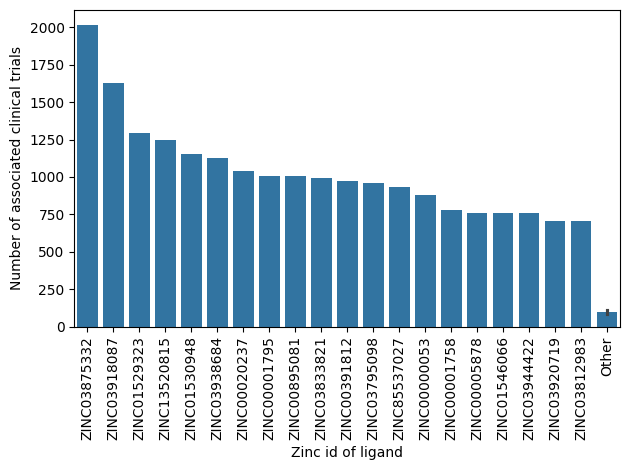

In [98]:
fig, ax = plt.subplots()

plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="ZINC ID of Ligand",
    ylabel="Number of associated clinical trials",
    title="",
    top_n=20,
)
plt.tight_layout()
plt.show()

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_12546/342458245.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


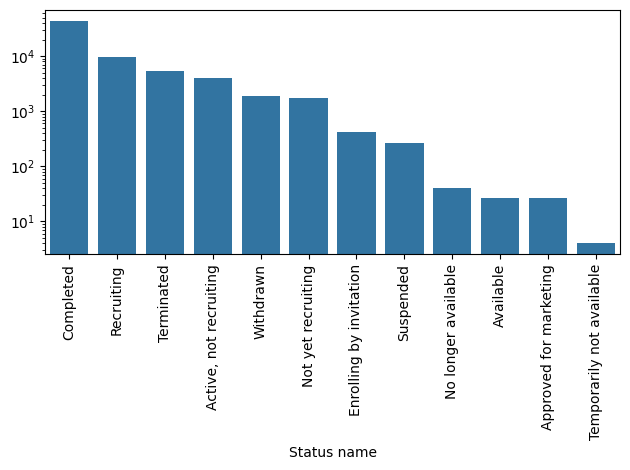

In [99]:
fig, ax = plt.subplots()
plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="status_name",
    ylabel="",
    title="",
    top_n=None,
    yscale="log",
)
plt.tight_layout()
plt.show()

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_12546/342458245.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


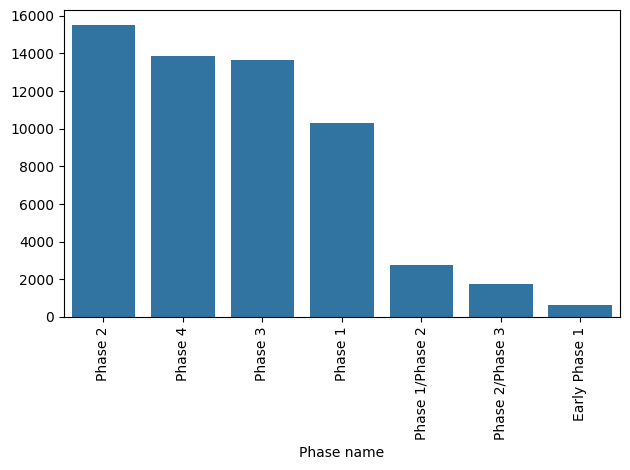

In [100]:
fig, ax = plt.subplots()

plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="phase_name",
    ylabel="",
    title="",
    top_n=None,
    yscale=None,
)
plt.tight_layout()
plt.show()

<Axes: xlabel='start_date', ylabel='Count'>

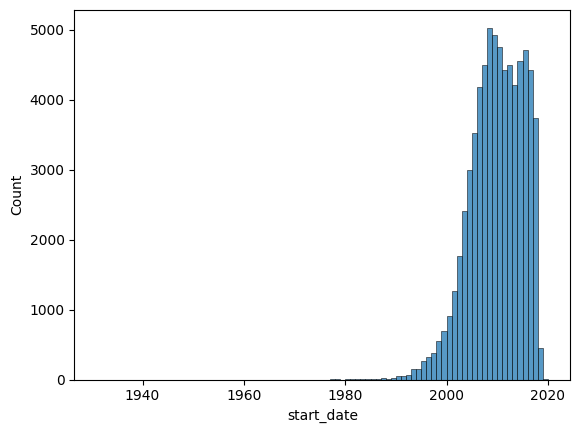

In [92]:
import datetime

sns.histplot(
    df_all["start_date"]
    .dropna()
    .apply(lambda date_str: datetime.date.fromisoformat(date_str).year)
    .to_frame(),
    x="start_date",
    binwidth=1,
)

/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_12546/342458245.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_12546/342458245.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/my/2hxsh9b90b9brv55p9f5x2700000gn/T/ipykernel_12546/342458245.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


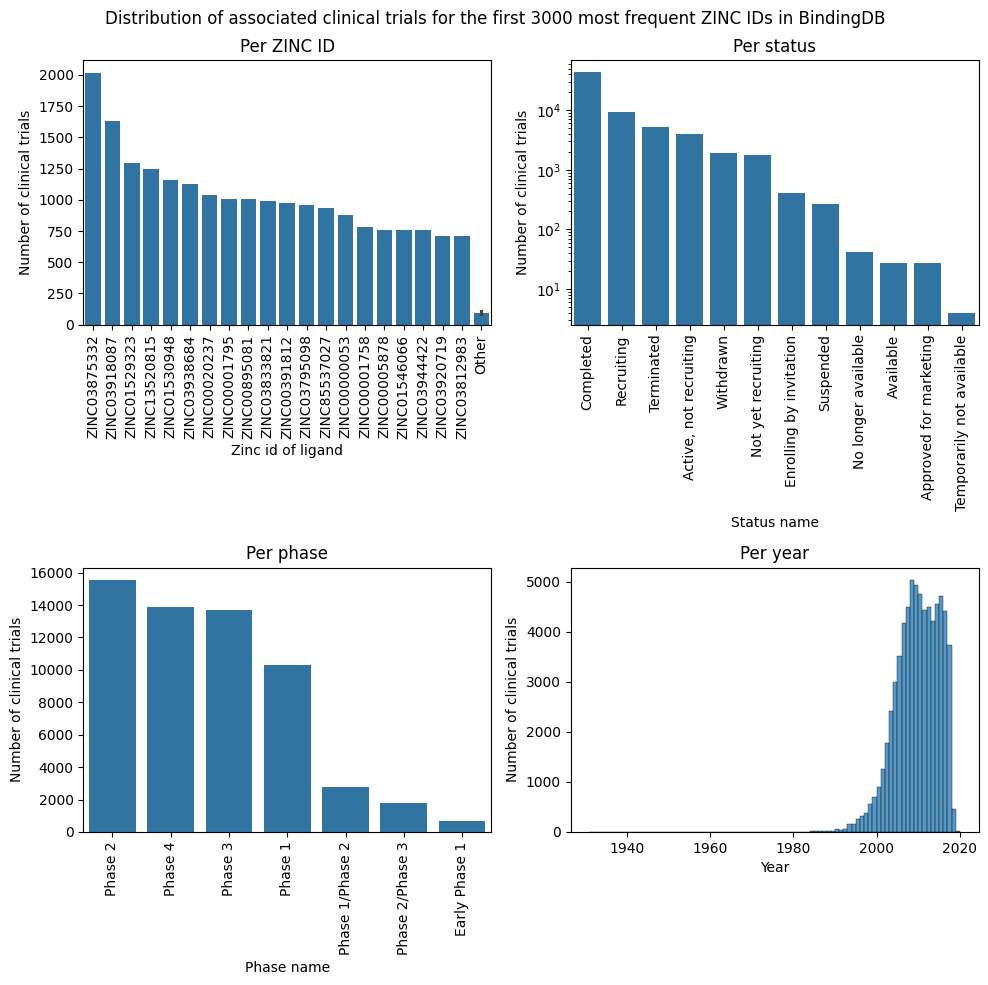

In [104]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
((ax1, ax2), (ax3, ax4)) = axes

ylabel = "Number of clinical trials"
list_kwargs = [
    dict(
        title="Per ZINC ID",
        col="ZINC ID of Ligand",
        ylabel=ylabel,
        top_n=20,
    ),
    dict(
        col="status_name",
        ylabel=ylabel,
        title="Per status",
        top_n=None,
        yscale="log",
    ),
    dict(
        col="phase_name",
        ylabel=ylabel,
        title="Per phase",
        top_n=None,
        yscale=None,
    ),
]

for ax, kwargs in zip(axes.flatten(), list_kwargs):
    plot_clinical_counts(df_all, ax, **kwargs)

sns.histplot(
    df_all["start_date"]
    .dropna()
    .apply(lambda date_str: datetime.date.fromisoformat(date_str).year)
    .to_frame(),
    x="start_date",
    binwidth=1,
    ax=ax4,
)
ax4.set_title("Per year")
ax4.set_xlabel("Year")
ax4.set_ylabel(ylabel)

fig.suptitle(
    "Distribution of associated clinical trials for the first 3000 most frequent ZINC IDs in BindingDB"
)

plt.tight_layout()
plt.show()